# Predicting Customer Churn in python: Exploratory Data Analysis

What exactly is Customer Churn? It is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company. It can be defined in a variety of ways.

**Contractual churn**: or when a customer is under contract for a service and decides to cancel their service. This can be found in Cable TV, and SaaS products.

**Voluntary churn**: Voluntary churn is when a user voluntarily cancels a service and includes Prepaid Cell Phones, Streaming Subscriptions.

**Non-contractual churn**: Non-Contractual or when a customer is not under contract for a service is the next example of churn, and includes consumer loyalty at a retail location or online browsing.

**Involuntary churn**: Credit card expiration
Finally involuntary churn, or when a churn occurs not at the request of the customer and includes, credit card expiration,

**Involuntary churn**: Utilities turned off or utilities being shut off by the provider.

Most likely, you as a customer have cancelled a service for a variety of reasons including:
* lack of usage, 
* poor service, or 
* better price


## The Dataset

In this project, we will learn how to build a churn model from beginning to end. The data we will be using comes from a Cellular Usage dataset that consists of records of actual Cell Phone customers, and features that include: 
* voice mail
* international calling
* cost for the service
* customer usage
* customer churn


In [1]:
import pandas as pd

In [3]:
telco_df=pd.read_csv('./Churn.csv')
telco_df

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,no,no,no,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,no,no,no,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


## Exploring customer churn

In [4]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [5]:
telco_df['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

We see that we have 483 churners and 2850 non-churners.

## The goal of the project

Our goal in this project is to build a model that uses the information about each customer in the dataset to classify whether or not a new customer will churn. This model, therefore, has two outcomes, or classes: Either a customer will churn, or not churn.

Before even getting to the model building stage, we can use exploratory data analysis to identify differences between these two classes that can help us better understand the drivers of customer churn. 

Some questions that we can ask of the data are:
* Do churners call customer service more often? 
* Does one state have more churners compared to another? 

## Summary statistics for both classes in Churn feature

In [6]:
df_small=telco_df[['Churn','CustServ_Calls','Vmail_Message']]

In [7]:
#Mean of CustServ_Calls and Vmail_Message for churners and non-churners
print(df_small.groupby(['Churn']).mean())

       CustServ_Calls  Vmail_Message
Churn                               
no           1.449825       8.604561
yes          2.229814       5.115942


In [8]:
#Standard deviation of CustServ_Calls and Vmail_Message for churners and non-churners
print(df_small.groupby(['Churn']).std())

       CustServ_Calls  Vmail_Message
Churn                               
no           1.163883      13.913125
yes          1.853275      11.860138


We can see that churners make more Customers service calls than non churners.

## Churn by state

In [11]:
pd.set_option('display.max_rows', 500)
print(telco_df.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
IN     no       62
       yes       9
KS     no       57
       yes      13
KY     no       51
       yes       8
LA     no       47
       yes       4
MA     no       54
       yes      11
MD     no       53
       yes      17
ME     no       49
       yes      13
MI     no       57
       yes      16
MN     no       69
       yes      15
MO     no       56
       yes       7
MS     no       51
       yes      14

## Exploring features distributions

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

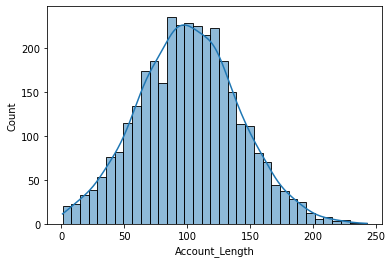

In [24]:
sns.histplot(telco_df['Account_Length'],kde=True)
plt.show()

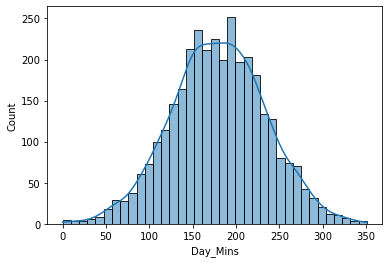

In [26]:
sns.histplot(telco_df['Day_Mins'],kde=True)
plt.show()

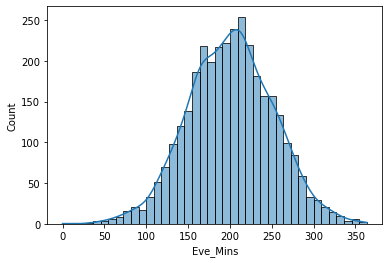

In [27]:
sns.histplot(telco_df['Eve_Mins'],kde=True)
plt.show()

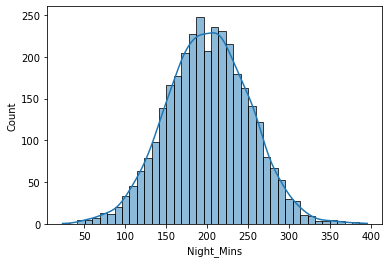

In [28]:
sns.histplot(telco_df['Night_Mins'],kde=True)
plt.show()

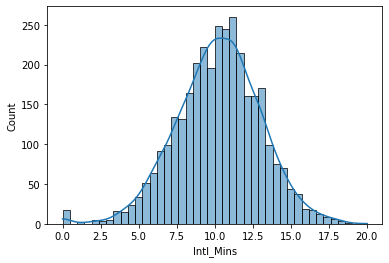

In [29]:
sns.histplot(telco_df['Intl_Mins'],kde=True)
plt.show()

## Customer service calls and churn

We've already seen that there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

Let's now visualize this difference using a box plot and incorporate other features of interest:
* do customers who have international plans make more customer service calls? 
* Or do they tend to churn more? 
* How about voicemail plans? 

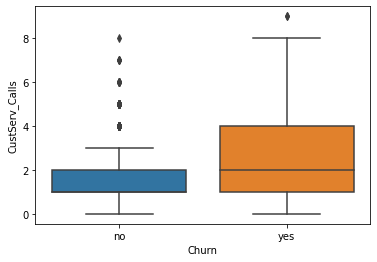

In [31]:
# Create the box plot
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco_df)

# Display the plot
plt.show()

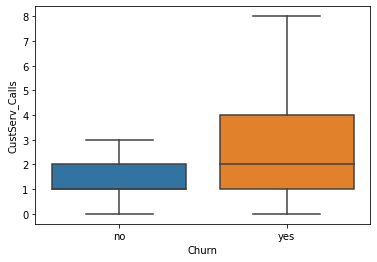

In [32]:
#Without outliers
# Create the box plot
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco_df,
          sym="")

# Display the plot
plt.show()

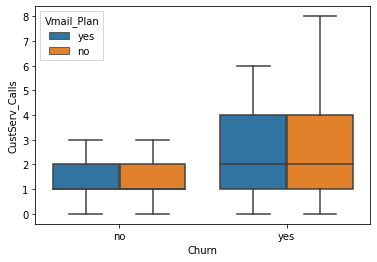

In [33]:
# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco_df,
            sym = "",
            hue = "Vmail_Plan")

# Display the plot
plt.show()

Not much of a difference. Let's try another feature.

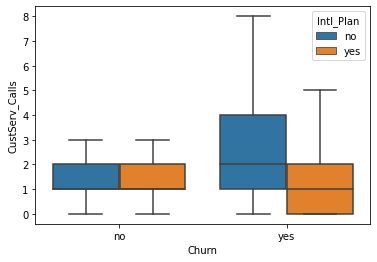

In [35]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco_df,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

 It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. 
 
 This type of information is really useful in better understanding the drivers of churn. 
 
 